# ETF factor decomposition

In [1]:
import edhec_risk_kit as erk
import fama_french_import as ff
import yahoo_import as yahoo

### Data Import

Import fama fench factor data

In [2]:
portfolio_info = yahoo.read_portfolio("value_usa_portfolio")
portfolio_returns = yahoo.read_portfolio_data(portfolio_info)

factors = ff.get_ff_factors("North_America_5_Factors", daily=True)
factors.head()

# Get a compatible time slice of both df
portfolio_returns, factors = erk.adjust_date_indexes([portfolio_returns, factors])

# Get 3 factors only and drop Risk Free Rate from factor DF
risk_free = factors["RF"]
factors = factors.drop(columns=["RMW", "CMA", "RF"])
factors.head()

,Mkt-RF,SMB,HML
Date,,,
2010-05-19,-0.0074,-0.0083,-0.0015
2010-05-20,-0.0409,-0.0092,-0.0109
2010-05-21,0.0149,0.0003,0.0136
2010-05-24,-0.0111,0.0026,-0.0087
2010-05-25,-0.0011,-0.0034,0.0044


<AxesSubplot:xlabel='Date'>

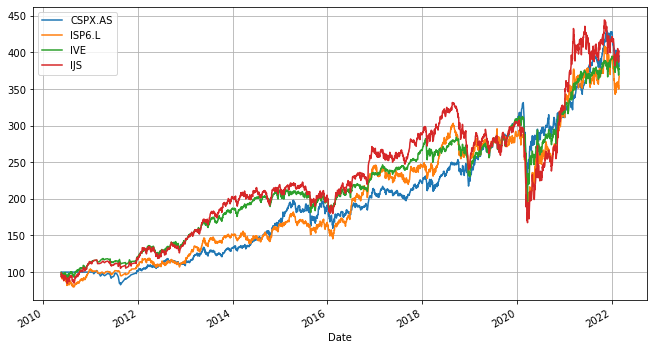

In [4]:
wealth = erk.compound_returns(portfolio_returns, 100)
wealth.plot(grid=True, figsize=(11,6))

### Factor regression

Get the excess returns (subtract risk free rate) from our portfolio

<AxesSubplot:ylabel='Frequency'>

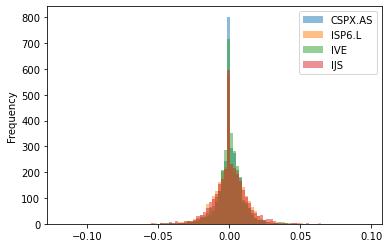

In [5]:
portfolio_excess_rets = portfolio_returns.sub(risk_free, axis=0).fillna(0)
portfolio_excess_rets.plot.hist(bins=100, alpha=0.5)

## CSPX, SP 500

In [6]:
lm = erk.linear_regression(portfolio_excess_rets["CSPX.AS"], factors)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                CSPX.AS   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     274.3
Date:                Fri, 22 Apr 2022   Prob (F-statistic):          1.05e-157
Time:                        15:39:14   Log-Likelihood:                 10197.
No. Observations:                3074   AIC:                        -2.039e+04
Df Residuals:                    3070   BIC:                        -2.036e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.4249      0.015     27.881      0.000       0.395       0.455
SMB           -0.0543      0.032     -1.703      0.089      -0.117       0.008
HML            0.0538      0.023      2.325      0.020       0.008       0.099
Alpha          0.0003      0.000      1.614      0.107    -5.5e-05       0.001
==============================================================================
Omnibus:                      891.983   Durbin-Watson:                   2.363
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32166.202
Skew:                          -0.691   Prob(JB):                         0.00
Kurtosis:                      18.787   Cond. No.                         209.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:>

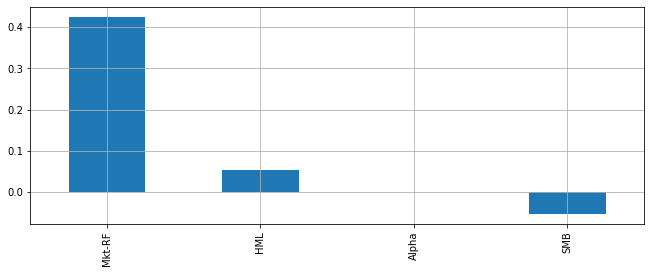

In [7]:
betas = lm.params
betas.sort_values(ascending=False).plot.bar(grid=True, figsize=(11,4))

### ISP6 - iShares S&P SmallCap 600 UCITS ETF

<AxesSubplot:>

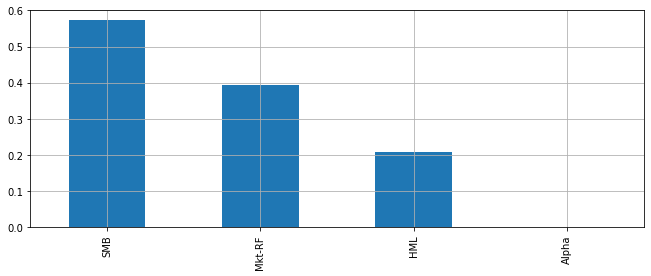

In [8]:
lm = erk.linear_regression(portfolio_excess_rets["ISP6.L"], factors)
lm.params.sort_values(ascending=False).plot.bar(grid=True, figsize=(11,4))

### IVE - iShares S&P 500 Value ETF (IVE)

<AxesSubplot:>

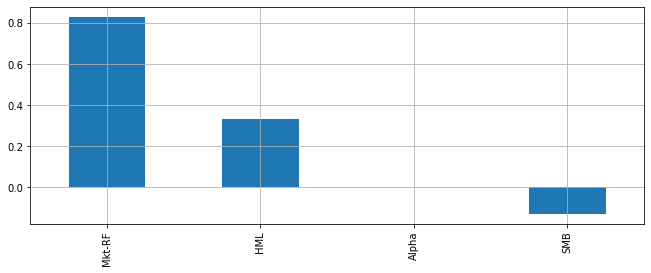

In [9]:
lm = erk.linear_regression(portfolio_excess_rets["IVE"], factors)
lm.params.sort_values(ascending=False).plot.bar(grid=True, figsize=(11,4))

### IJS - iShares S&P Small-Cap 600 Value ETF (IJS)

<AxesSubplot:>

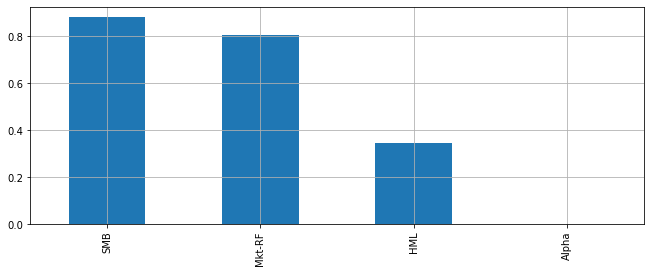

In [10]:
lm = erk.linear_regression(portfolio_excess_rets["IJS"], factors)
lm.params.sort_values(ascending=False).plot.bar(grid=True, figsize=(11,4))